<a href="https://colab.research.google.com/github/bobabap/RECORD-STORY/blob/main/n111a_eda_ipynb_%5B1%EC%B0%A8_%EC%A0%9C%EC%B6%9C%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 1*

---

# 📝 Assignment



## 1.데이터셋 불러오기 연습

다음 url에서 엑셀 파일을 불러오세요. (pandas excel)

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx>

  - 데이터셋 변수의 이름은 `df1`, `df2`로 저장하세요.
  - row가 아닌 column에 '매출액', '영업이익' 이 가도록 데이터를 transpose 하세요.
  - 이후 아래 링크를 참조하여 첫번째 row를 column name으로 설정하세요.

<https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row>

- 파일은 2개의 시트로 구성되어 있으며 각각 이름은 `008770`, `035250` 입니다.



In [ ]:
import pandas as pd
import openpyxl
pd.set_option('display.max_columns', None)

pandas_excel_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'
df1 = pd.read_excel(pandas_excel_url, sheet_name=0)
df1 = df1.T
df1.columns = df1.iloc[0]
df1 = df1[1:]
print(df1)



print('----------------------------------------------------')



df2 = pd.read_excel(pandas_excel_url, sheet_name=1)
df2 = df2.T
df2.columns = df2.iloc[0]
df2 = df2[1:]
print(df2)

주요재무정보                  매출액 영업이익 영업이익(발표기준) 세전계속사업이익 당기순이익 당기순이익(지배)  \
2019/09\n(IFRS연결)     14753  574        574      376   274       277   
2019/12\n(IFRS연결)     15440  776        776      538   380       380   
2020/03\n(IFRS연결)      9437 -668       -668     -925  -736      -736   
2020/06\n(IFRS연결)      5230 -634       -634     -819  -677      -678   
2020/09\n(IFRS연결)      8795 -198       -198     -366  -285      -285   
2020/12(E)\n(IFRS연결)   9980   50        NaN     -109  -100      -100   
2021/03(E)\n(IFRS연결)   9761  144        NaN       14    71        53   
2021/06(E)\n(IFRS연결)   9820  265        NaN      172   214       123   

주요재무정보               당기순이익(비지배)   자산총계   부채총계  자본총계 자본총계(지배) 자본총계(비지배)   자본금  \
2019/09\n(IFRS연결)            -3  37747  28854  8893     8889         4  2000   
2019/12\n(IFRS연결)             0  35273  26077  9195     9192         4  2000   
2020/03\n(IFRS연결)             0  33188  24813  8375     8371         4  2000   
2020/06\n(IFRS연결)             1

## 2. 데이터 확인

- 데이터의 dimension을 확인하세요.
- 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요.
- 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
  - 0보다 큰 값인 셀 개수의 총합을 `num1`에, 작은 값인 셀 개수의 총합을 `num2`에 저장하세요


In [ ]:
'''
- 데이터의 dimension을 확인하세요. 
- 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요. 
- 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
- 0보다 큰 값인 셀 개수의 총합을 `num1`에, 작은 값인 셀 개수의 총합을 `num2`에 저장하세요'''
import pandas as pd
import openpyxl
pd.set_option('display.max_columns', None)

pandas_excel_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'
df1 = pd.read_excel(pandas_excel_url, sheet_name=0)
df1 = df1.T
df1.columns = df1.iloc[0]
df1 = df1[1:]

df2 = pd.read_excel(pandas_excel_url, sheet_name=1)
df2 = df2.T
df2.columns = df2.iloc[0]
df2 = df2[1:]

# - 데이터의 dimension을 확인하세요.
print(df1.shape)

# 008770시트의 DataFrame 결측치 확인
is_null = pd.DataFrame(df1.isnull())
# print(is_null)

# - 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요.
is_fillna = pd.DataFrame(df1.fillna(0))
# print(is_fillna)

# - 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
df1['FCF'].plot.bar()
df2['FCF'].plot.bar()


# - 0보다 큰 값인 셀 개수의 총합을 `num1`에, 작은 값인 셀 개수의 총합을 `num2`에 저장하세요'''
num1 = df1.FCF[df1['FCF'] > 0].value_counts().sum() + df2.FCF[df2['FCF'] > 0].value_counts().sum()
num2 = df1.FCF[df1['FCF'] < 0].value_counts().sum() + df2.FCF[df2['FCF'] < 0].value_counts().sum()

print(num1,num2)



(8, 32)
4 6


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)


## 3. File export

- 읽었던 엑셀 파일의 내용을 2개의 csv로 각각 출력하세요. (python export csv)

  - 이름은 각각 `df1.csv`, `df2.csv` 입니다.


(8, 32)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)


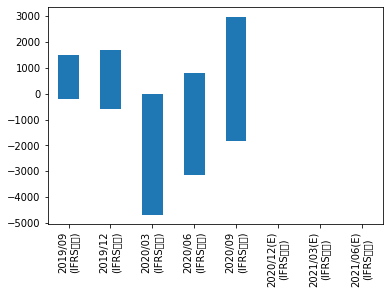

In [ ]:
import pandas as pd
import openpyxl
pd.set_option('display.max_columns', None)

pandas_excel_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'
df1 = pd.read_excel(pandas_excel_url, sheet_name=0)
df1 = df1.T
df1.columns = df1.iloc[0]
df1 = df1[1:]

df2 = pd.read_excel(pandas_excel_url, sheet_name=1)
df2 = df2.T
df2.columns = df2.iloc[0]
df2 = df2[1:]

# - 데이터의 dimension을 확인하세요.
print(df1.shape)

# 008770시트의 DataFrame 결측치 확인
is_null = pd.DataFrame(df1.isnull())
# print(is_null)

# - 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요.
is_fillna = pd.DataFrame(df1.fillna(0))
# print(is_fillna)

# - 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
df1['FCF'].plot.bar()
df2['FCF'].plot.bar()


# - 0보다 큰 값인 셀 개수의 총합을 `num1`에, 작은 값인 셀 개수의 총합을 `num2`에 저장하세요'''
num1 = df1.FCF[df1['FCF'] > 0].value_counts().sum() + df2.FCF[df2['FCF'] > 0].value_counts().sum()
num2 = df1.FCF[df1['FCF'] < 0].value_counts().sum() + df2.FCF[df2['FCF'] < 0].value_counts().sum()

df1.to_csv("./df1.csv", index=True)
df2.to_csv("./df2.csv", index=True)



## 4. Error Handling

- 다음의 에러를 고치세요. 결과값은 6912가 나와야합니다.


In [ ]:
a = 1234
b = 5678

a+b

6912

## 5. EDA

아래의 코드는 palmer penguin 데이터를 불러올 수 있는 코드입니다.

```python
import seaborn as sns

pp = sns.load_dataset('penguins')
```

이를 참조하여, `pp`의 `species`와 `sex`변수에 대해서 cross-tabulation을 시행하고, 6개의 값들 중 가장 큰 값을 `num3`에, 가장 작은 값을 `num4`에 저장하세요.

In [ ]:
pp = sns.load_dataset('penguins')

pp_crosstab = pd.crosstab(index=pp["species"], columns=pp["sex"])

num3 = pp_crosstab.max()[0]
num4 = pp_crosstab.min()[0]

print(num3, num4)




73 34


## 🔥 도전과제 

### penguins 데이터를 계속 사용합니다.

이에 대해 아래의 task들을 시행하세요.

- 결측치 처리 (제거)

- bill_length_mm에 대해서 qqplot 그리기

- island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기

- 각 numerical feature에 대해서 summary statistics : mean, sd, Quantiles(1Q, 2Q, 3Q, 4Q)를 계산하세요.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

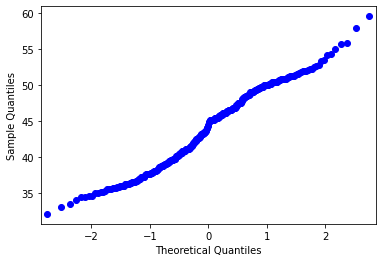

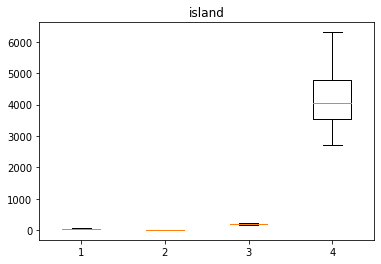

summary statistics : bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64 bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64 bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
Name: 0.5, dtype: float64


In [ ]:
import pandas as pd
import openpyxl
import seaborn as sns

import statsmodels.api as sm 
import matplotlib.pyplot as plt

pp = sns.load_dataset('penguins')
pp_thresh = pp.dropna()
print(pp_thresh)

qq_plot = sm.qqplot(pp_thresh['bill_length_mm'])
plt.show()

green_diamond = dict(markerfacecolor='g', marker='D')

data = [pp_thresh['bill_length_mm'], pp_thresh['bill_depth_mm'], pp_thresh['flipper_length_mm'], pp_thresh['body_mass_g']]
plt.boxplot(data, flierprops=green_diamond)
plt.title('island')
plt.show()

pp_mean = pp_thresh[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].mean()
pp_sd = pp_thresh[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].std()
pp_quantiles =pp_thresh[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].quantile()
print('summary statistics :',pp_mean, pp_sd, pp_quantiles)


#결측치 처리 (제거) @
#bill_length_mm에 대해서 qqplot 그리기
#island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기
#각 numerical feature에 대해서 summary statistics : mean, sd, Quantiles(1Q, 2Q, 3Q, 4Q)를 계산하세요

